In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

In [2]:
data = pd.read_csv('P:/python/Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data = data.rename({'Marital.Status':'martial_status', 'Taxable.Income':'tax_income', 'City.Population':'city_pop', 'Work.Experience':'work_exper'}, axis = 1)
data.head()

,Undergrad,martial_status,tax_income,city_pop,work_exper,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data1 = data.copy()

In [5]:
data1['tax_income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: tax_income, dtype: float64

In [6]:
data1['tax_grp'] = pd.cut(data1['tax_income'], bins = [10002,30000,99619], labels = ['risky', 'good'])
data1.head()

,Undergrad,martial_status,tax_income,city_pop,work_exper,Urban,tax_grp
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [7]:
data1 = data1.drop(['tax_income'], axis = 1)
data1.head()

,Undergrad,martial_status,city_pop,work_exper,Urban,tax_grp
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good


In [10]:
le = LabelEncoder()
data1['Undergrad'] = le.fit_transform(data1['Undergrad'])
data1['martial_status'] = le.fit_transform(data1['martial_status'])
data1['Urban'] = le.fit_transform(data1['Urban'])
data1['tax_grp'] = le.fit_transform(data1['tax_grp'])
data1

,Undergrad,martial_status,city_pop,work_exper,Urban,tax_grp
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [1]:
columns = ['Undergrad', 'martial_status', 'Urban', 'tax_grp']

In [11]:
for i in columns:
    print(f'{i} is \n{data1[i].value_counts()}')

Undergrad is 
1    312
0    288
Name: Undergrad, dtype: int64
martial_status is 
2    217
1    194
0    189
Name: martial_status, dtype: int64
Urban is 
1    302
0    298
Name: Urban, dtype: int64
tax_grp is 
0    476
1    124
Name: tax_grp, dtype: int64


In [12]:
x = data1.iloc[:,:5]
y = data1.iloc[:,5]
print(x.head())
y.head()

   Undergrad  martial_status  city_pop  work_exper  Urban
0          0               2     50047          10      1
1          1               0    134075          18      1
2          0               1    160205          30      1
3          1               2    193264          15      1
4          0               1     27533          28      0


0    0
1    0
2    0
3    0
4    0
Name: tax_grp, dtype: int32

In [80]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=40)

In [81]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(450, 5) (150, 5) (450,) (150,)


### Building Decision Tree  using Entropy

[Text(418.5, 475.65000000000003, 'X[2] <= 60294.5\nentropy = 0.722\nsamples = 450\nvalue = [360, 90]'),
 Text(251.10000000000002, 339.75, 'X[3] <= 23.5\nentropy = 0.524\nsamples = 93\nvalue = [82, 11]'),
 Text(167.4, 203.85000000000002, 'X[2] <= 54275.0\nentropy = 0.622\nsamples = 71\nvalue = [60, 11]'),
 Text(83.7, 67.94999999999999, 'entropy = 0.708\nsamples = 57\nvalue = [46, 11]'),
 Text(251.10000000000002, 67.94999999999999, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(334.8, 203.85000000000002, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(585.9, 339.75, 'X[2] <= 61459.5\nentropy = 0.763\nsamples = 357\nvalue = [278, 79]'),
 Text(502.20000000000005, 203.85000000000002, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(669.6, 203.85000000000002, 'X[2] <= 63983.0\nentropy = 0.759\nsamples = 356\nvalue = [278, 78]'),
 Text(585.9, 67.94999999999999, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(753.3000000000001, 67.94999999999999, 'entropy = 0.764\nsampl

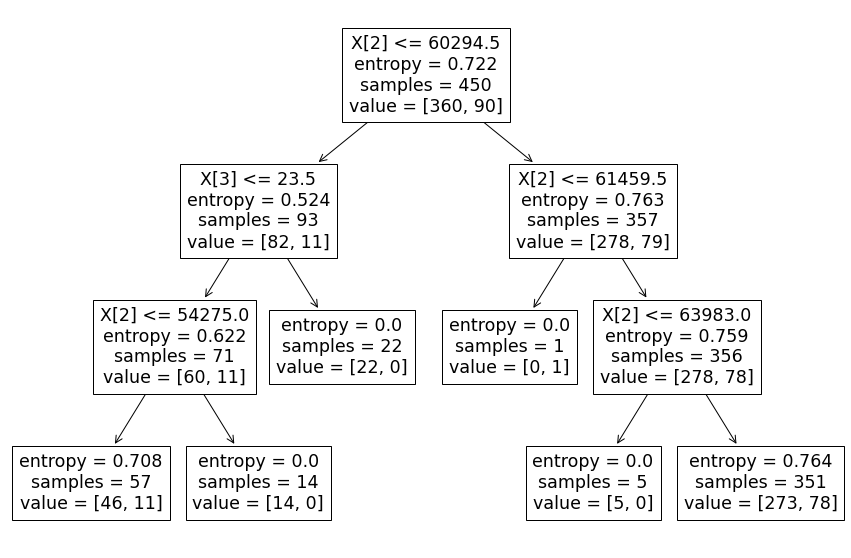

In [82]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)
plt.figure(figsize = (15, 10))
tree.plot_tree(model)

In [83]:
preds = model.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
np.mean(preds==y_test)

0.7733333333333333

In [85]:
model.score(x_test,y_test)

0.7733333333333333

### Building Decision Tree using Gini impurity

[Text(418.5, 489.24, 'X[2] <= 63983.0\ngini = 0.32\nsamples = 450\nvalue = [360, 90]'),
 Text(232.5, 380.52000000000004, 'X[2] <= 40128.5\ngini = 0.213\nsamples = 99\nvalue = [87, 12]'),
 Text(139.5, 271.8, 'X[3] <= 18.5\ngini = 0.326\nsamples = 39\nvalue = [31, 8]'),
 Text(93.0, 163.08000000000004, 'X[2] <= 36940.0\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(46.5, 54.360000000000014, 'gini = 0.32\nsamples = 20\nvalue = [16, 4]'),
 Text(139.5, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(186.0, 163.08000000000004, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(325.5, 271.8, 'X[4] <= 0.5\ngini = 0.124\nsamples = 60\nvalue = [56, 4]'),
 Text(279.0, 163.08000000000004, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(372.0, 163.08000000000004, 'X[2] <= 52504.0\ngini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(325.5, 54.360000000000014, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.32\nsamples = 20\

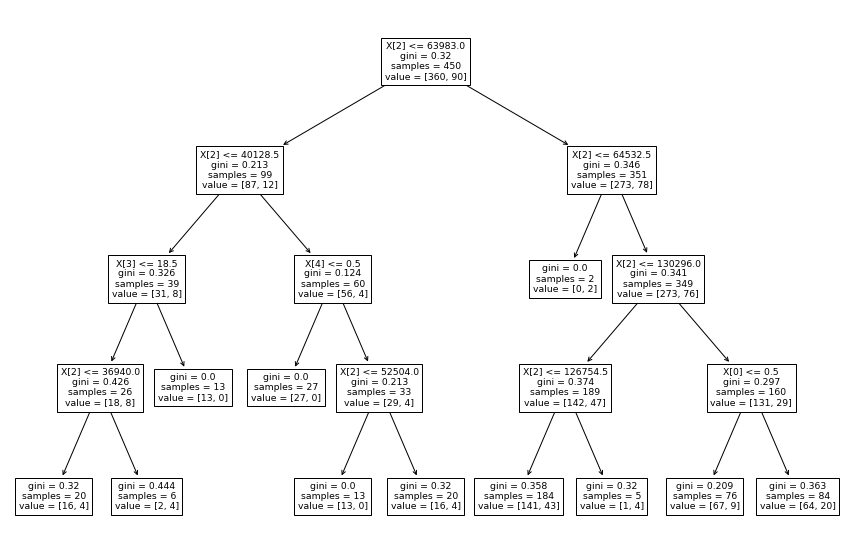

In [86]:
model_gini = DecisionTreeClassifier(criterion ='gini', max_depth=4)
model_gini.fit(x_train, y_train)
plt.figure(figsize = (15, 10))
tree.plot_tree(model_gini)

In [87]:
preds_gini = model_gini.predict(x_test)
preds_gini

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [88]:
np.mean(preds_gini == y_test)

0.7533333333333333

In [89]:
model_gini.score(x_test,y_test)

0.7533333333333333

Firstly i have load a dataset and i have observed that the names of the columns are not familiar with python and i have done renaming. Then as in the problem statement i have divided taxable income lessthan 30000 as risky and remaining as good by the help of pandas cut method. After that with the labelencoder method i have done labelencoding for the necessary columns. After that i have divided the data into input and output by naming as x and y. Then by using trian_test_split ihave divided data into xtrian, ytrian, xtest, ytest by giving test = 25% and random state = 40. Then i have build a DecisionTreeClassifier model with criterion as entropy and by giving xtrain and ytrain. And i have plotted decision tree with depth 3. Then i have done prediction by giving xtest. And i have fing model accuracy is 77%. Next i have build a DecisionTreeClassifier model with criterion as Gini and by giving xtrain and ytrain. And i have plotted decision tree with depth 4. Then i have done prediction by giving xtest. And i have fing model accuracy is 75%. 